## 6.6 Problem Solving: Discovering Algorithms by Manipulating Physical Objects

HERE 20210430

In [1]:
# DO NOT DELETE THIS. MAY BE REQUIRED FOR DISPLAYING IMAGES AND/OR VIDEOS.
#
from IPython.display import display, Image, SVG, Math, YouTubeVideo

We are back to _LEARNING TO SOLVE PROBLEMS ON PAPER_ ...

Suppose you were given the following list of values&mdash;do not immediately think of a Python list&mdash;and asked to swap the first half of the list with the second half without modifying the order of the elements within those halves.

Start with:

<span style="background-color: coral; letter-spacing: 3px; font-size: 18px;">🄰🄱🄲🄳🄴</span><span style="background-color: #aaaaff; letter-spacing: 3px; font-size: 18px;">❶❷❸❹❺</span>

End up with:

<span style="background-color: #aaaaff; letter-spacing: 3px; font-size: 18px;">❶❷❸❹❺</span><span style="background-color: coral; letter-spacing: 3px; font-size: 18px;">🄰🄱🄲🄳🄴</span>




The book suggests using coins to emulate how you may go about accomplishing this task in a __systematic__ or __algorithmic__ method.

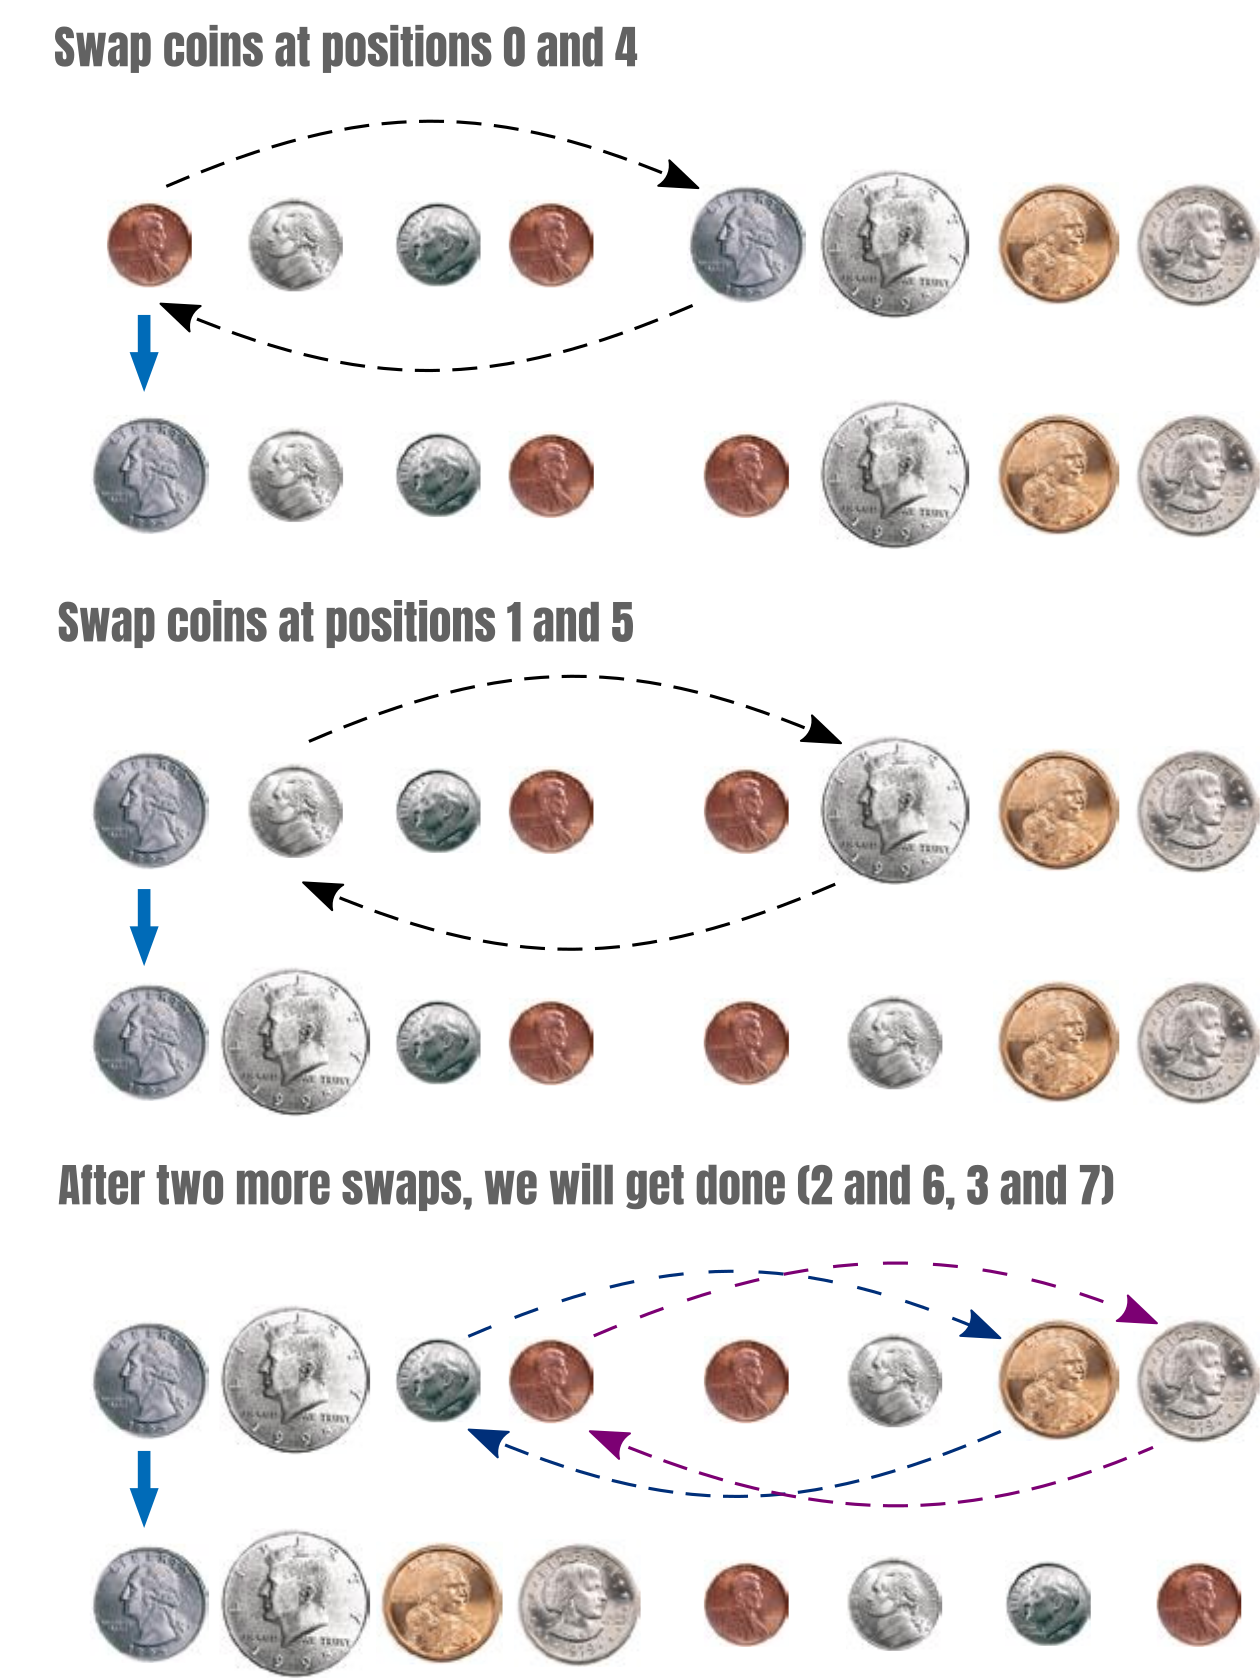

In [336]:
Image( 'figures/png/pfe3-swapping-coins.png', width=500 )

So the _algorithm_ starts taking shape, even though some parts may still be unclear. 

Note that we need to develop algorithms by _successive refinement_. Part of doing so may mean that we do not know everything at a given point during this development. With refinement, we will give ourselves the chance to think and fill in the missing pieces.

Here is what we may be able to formulate so far in *pseudo-code*.

Let's write down all the swaps we have to do by position:

    i      j
    0 ◀──▶ 4
    1 ◀──▶ 5
    2 ◀──▶ 6
    3 ◀──▶ 7

#### Observations:

- Swapping starts in terms of halves (`0 1 2 3 | 4 5 6 7`)
- The while-loop must stop when we reach index `i=3` as far as this example is concerned.

Therefore, if we increment `i` in the range `[0 .. len( values ) - 1]`, it seems safe.

About `j`: We will start right in the middle of the list, at `len( values ) // 2`, that is, `8 // 2`, which gives us the index value of `4`.

So, let's write down the refined version of our algorithm.  

At this time, you should __TEST__ this algorithm __ON PAPER__. Do this as an exercise on your own now.

See if the above algorithm works for

    A 1
    A B 1 2
    A B C 1 2 3
    A B C D 1 2 3 4
    A B C D E 1 2 3 4 5

In [2]:
def swap_halves( values ):
    """
    """
    i = 0
    j = len( values ) // 2 # Note that we need an int back!
    
    while j < len( values ):
        # Swap using tuple assignment
        # Increment i and j values
        values[i], values[j] = values[j], values[i]
        i += 1
        j += 1
        
    # Let's also return the swapped list so that we can see the 
    # result of this implementation right away when we call this
    # function in a single notebook cell or at a Python prompt.
    #
    return values

In [3]:
values = ["A", "B", "C", "D", "E", 1, 2, 3, 4, 5]

swap_halves( values )

[1, 2, 3, 4, 5, 'A', 'B', 'C', 'D', 'E']

---

One of Golden Rules of Software Development is that

## You should always __TEST YOUR CODE TO DEATH!!!__

So you need to think of ways for __BREAKING YOUR CODE__ during this critical testing phase of development.

Remember, if you cannot break your code, someone else will, unless you did a perfect job. To make sure you have done well, just get used to test your code to absolute death!!!

So far, we have, in a way, implicitly assumed that the input sequence would have an even number of values. However, it is entirely possible that the input sequence will have an odd number of values.

Let's see what would happen if we had an __odd__ number of values. 

In [4]:
values = ["A", "B", "C", "D", "E", "◉", 1, 2, 3, 4, 5]

swap_halves( values )

['◉', 1, 2, 3, 4, 5, 'B', 'C', 'D', 'E', 'A']

**Obivously, our code only works for even-numbered sequences, but, it fails with odd-numbered ones!**

However, we should have gotten this:
    
    [1, 2, 3, 4, 5, "◉", "A", "B", "C", "D", "E"]
    
That is, the middle item, "◉" should have remained where it was originally, since it would have been swapped with itself.

So our algorithm works fine as long as we have even-numbered elements in our input list. However, obviously, we need to get our code to work in all cases.

Since we managed to break our own code, we need to back to the drawing board.

Again, remember that working off of _managable_ examples will help. So let us consider a case like the one we just ran to see if we can gain some insights into how we may rework our algorithm to adapt to cases with an odd-number of items.

So let us say that we have

    VALUES: ["A", "B", "C", "D", "E", "◉",  1,  2,  3,  4,  5]
    ──────────────────────────────────────────────────────
    INDICES:  0    1    2    3    4    5    6   7   8   9   10
    
We need to do the following swaps:

    0 ◀──▶ 6
    1 ◀──▶ 7
    2 ◀──▶ 8
    3 ◀──▶ 9
    4 ◀──▶ 10
    
and, to complete the story,

    5 ◀──▶ 5
        
However, the `5 ◀──▶ 5` "swap" is a _special case_, and, indeed, it does not even have to happen at all, since it will be swapping the value onto itself! So if we can cleverly ignore it, that much the better.

So, what do we see in the above _pattern_ of index values?

Note that we have `11` elements in the above list, and we need to run through the first five values and the last five values.

We can tell that `len( values ) // 2` will get us `5`. 

So, `range( len( values ) // 2 )` will get us the range `[0, 1, 2, 3, 4]`.

Where do we start? __NOT__ at the index `len( values ) // 2` obviously. 

Instead, we need to start at `len( values ) // 2 + 1` so that we skip over the middle element.

If we need to start at `len( values ) // 2 (+ 0)` when we have an even number of items and `len( values ) // 2 + 1` when we have an odd number of items, does this mean that we will have to check whether the input list has even or odd number of items?

We can give this idea a try.

In [5]:
def swap_halves( values ):
    """
    Note that when we have an even number of items in the input list, the
    modulus operator will result in a 0, and, when we have an odd number
    of items, it will result in a 1.
    """
    n_items = len( values )
    i = 0
    j = n_items // 2 + n_items % 2 # Note that we need an int back!
    
    while j < len( values ):
        #
        values[i], values[j] = values[j], values[i]
        i += 1
        j += 1
        
    # Let's also return the swapped list so that we can see the 
    # result of this implementation right away when we call this
    # function in a single notebook cell or at a Python prompt.
    #
    return values

In [6]:
# EVEN TEST: 10 items
#
values = ["A", "B", "C", "D", "E", 1, 2, 3, 4, 5]

swap_halves( values )

[1, 2, 3, 4, 5, 'A', 'B', 'C', 'D', 'E']

In [7]:
# ODD TEST: 11 items
#
values = ["A", "B", "C", "D", "E", "◉", 1, 2, 3, 4, 5]

swap_halves( values )

[1, 2, 3, 4, 5, '◉', 'A', 'B', 'C', 'D', 'E']

After having done this, I can still think of "crazy" examples to test for.

- What if we have an empty list?

- What if we only have a single item?

- What if we have exactly two items?

- What if we have three items?

In [8]:
# EMPTY LIST TEST
#
swap_halves( [] )

[]

In [9]:
# SINGLE ITEM TEST
#
values = ["A"]

swap_halves( values )

['A']

In [10]:
# TWO ITEM TEST
#
values = ["A", 5]

swap_halves( values )

[5, 'A']

In [11]:
# THREE ITEM TEST
#
values = ["A", "◉", 5]

swap_halves( values )

[5, '◉', 'A']

---
Now, after having conducted the above tests, we can be much more confident about our code than otherwise.

The lesson to draw from all this is the following:

### If we learn to __QUESTION__ our own work and __TEST__ our code well, we can always write much better code than otherwise!!!

---

***SIDENOTE:***

Software testing is a rich subject that requires an entire course to itself. In NEU Engineering, we have ECC422 ("Software Testing") that discusses this subject matter exclusively.

## 6.7 Tables

Working with 2-dimensional data is an essential skill you will have to have at some point in your  career.

So let us consider the data provided in your textbook.

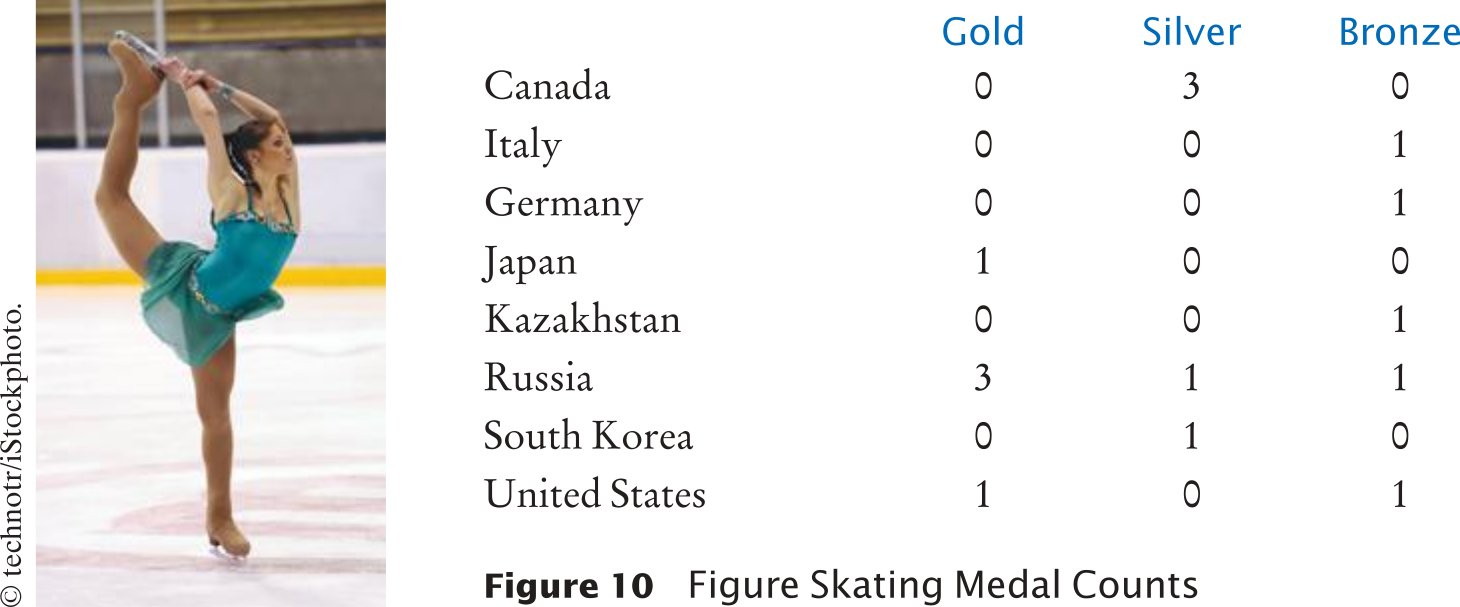

In [13]:
Image( 'figures/png/pfe3-figure-010.png', width=600 )

### 6.7.1 Creating Tables

In [14]:
%%file data/pfe3-figure-010.dat
Country;Gold;Silver;    Bronze
       Canada    ;0;3;0
    Italy;0;0;1
    germany;0;0;1
    Japan;1;0;0
    Kazakhstan;0;0;1
    Russia;3;1;1
       south Korea;0;1;0
    United   states;1;0;1


   

Overwriting data/pfe3-figure-010.dat


We will assume that this data is in a file in CSV format with the `;` character as delimiter:

Note that we've added `Country` as a column title.

This data is in [`data/pfe3-figure-010.dat`](data/pfe3-figure-010.dat).

Note that country names have extra spaces in them, and some of them are written in lowercase, and so on.

Next we will read this data from this input file. We will read one line at a time. Since each line of data is separated by `;`, we will take advantage of functions that Python offers us in the `str` class.

In [15]:
data = []
input_data_filepath = 'data/pfe3-figure-010.dat'

with open( input_data_filepath, "r" ) as infile:
    #
    for cur_line in infile:
        #
        # print( f"--- Read line: <{cur_line}>" )
        #
        country, n_gold, n_silver, n_bronze = cur_line.split( ';' )
        print( f"--- country: {country:20s}: G: {n_gold:2s}, S: {n_silver:2s}, B: {n_bronze:2s}", end="" )

--- country: Country             : G: Gold, S: Silver, B:     Bronze
--- country:        Canada       : G: 0 , S: 3 , B: 0
--- country:     Italy           : G: 0 , S: 0 , B: 1
--- country:     germany         : G: 0 , S: 0 , B: 1
--- country:     Japan           : G: 1 , S: 0 , B: 0
--- country:     Kazakhstan      : G: 0 , S: 0 , B: 1
--- country:     Russia          : G: 3 , S: 1 , B: 1
--- country:        south Korea  : G: 0 , S: 1 , B: 0
--- country:     United   states : G: 1 , S: 0 , B: 1


ValueError: not enough values to unpack (expected 4, got 1)

__Why the error?__

We got this error due to the empty lines at the end of our input file.

----

Since the first line in the file are the column names, we have them treated as regular data for now.

Moreover, all values we have read so far are all strings. We will have to convert the values for gold, silver, and bronze into integers.

We may have to fix up the country strings such as by removing extra spaces and capitalizing each word.

So, given the format of the data, the following code will handle this data much better than the code above.

In [19]:
data = []
input_data_filepath = 'data/pfe3-figure-010.dat'

with open( input_data_filepath ) as infile: # Open for READING
    #
    # Read the column names separately.
    #
    columns = infile.readline().split( ';' )

    print( f"--- Columns: {columns}" )

    for cur_line in infile: # Continue from second line on
        #
        country, gold, silver, bronze = cur_line.split( ';' )
        #
        # Print without an end-of-line, since the bronze value has an end-of-line at the end of it.
        #
        #print( f"--- country: {country:20s}: G: {gold:2s}, S: {silver:2s}, B: {bronze:2s}" )
        print( f"--- country: {country:20s}: G: {gold:2s}, S: {silver:2s}, B: {bronze:2s}", end="" )

--- Columns: ['Country', 'Gold', 'Silver', '    Bronze\n']
--- country:        Canada       : G: 0 , S: 3 , B: 0
--- country:     Italy           : G: 0 , S: 0 , B: 1
--- country:     germany         : G: 0 , S: 0 , B: 1
--- country:     Japan           : G: 1 , S: 0 , B: 0
--- country:     Kazakhstan      : G: 0 , S: 0 , B: 1
--- country:     Russia          : G: 3 , S: 1 , B: 1
--- country:        south Korea  : G: 0 , S: 1 , B: 0
--- country:     United   states : G: 1 , S: 0 , B: 1


ValueError: not enough values to unpack (expected 4, got 1)

Note that the last value on each line has an _end-of-line_ character. So we have a few things to do to _clean up_ our data before we can start using this data for any sort of analysis.

Our goal is to represent our data using a list for each row of data in a bigger list.

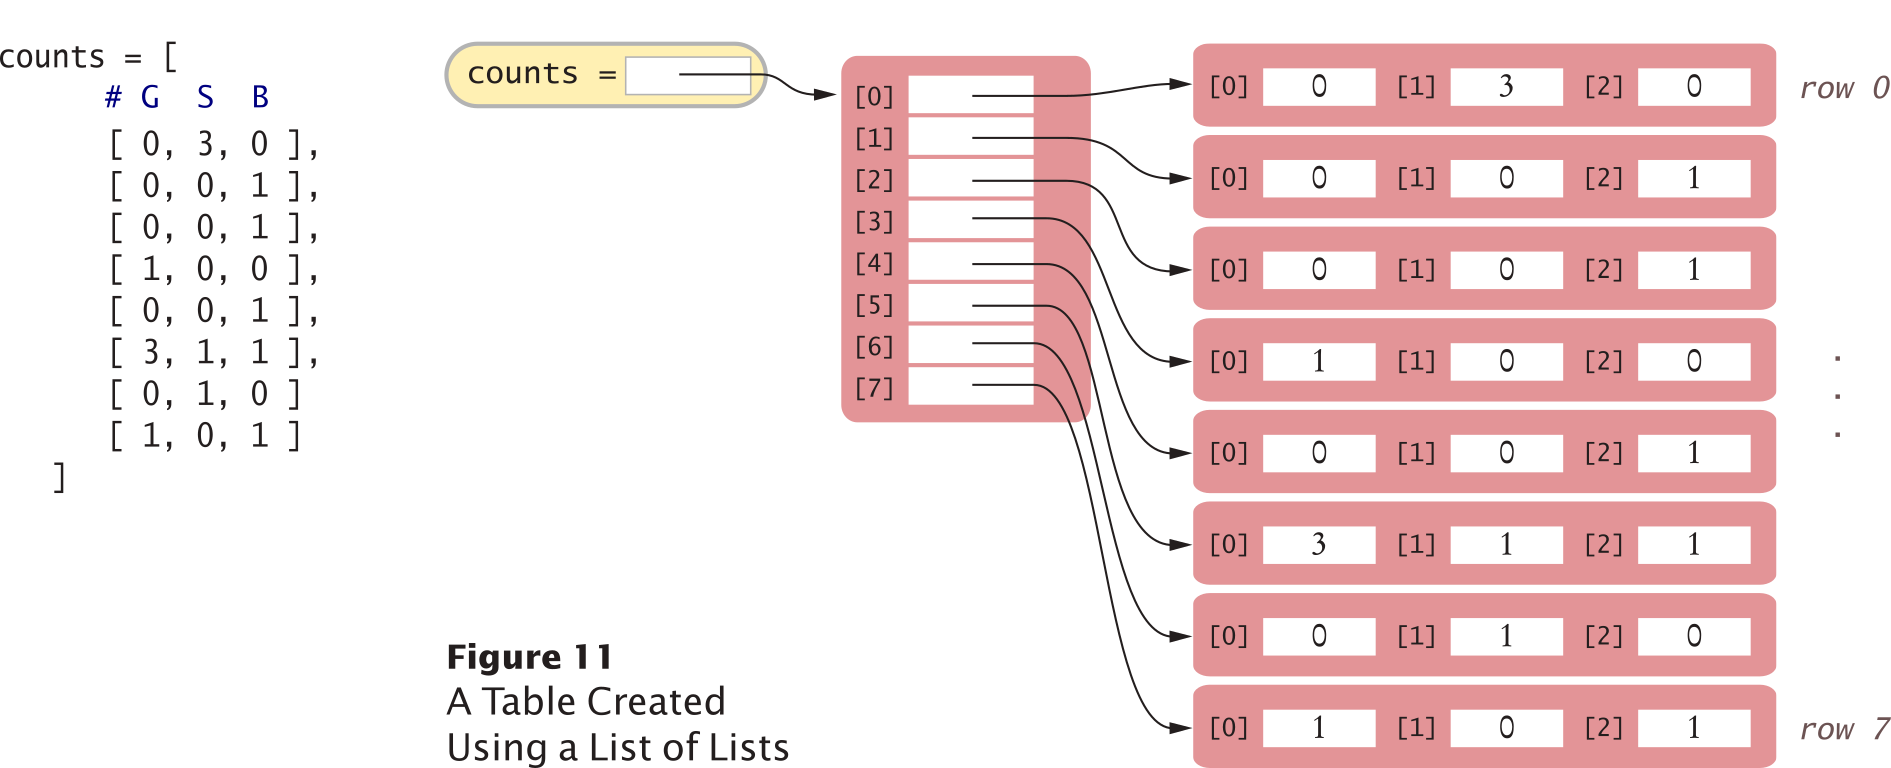

In [20]:
Image( 'figures/png/pfe3-figure-011.png', width=700 )

### 6.7.2 Accessing Elements

The goal is to be able to access individual pieces of data in 2-dimensional format using _row_ and _column_ indices. For example:

    silver_medal_count = counts[3][1]
    
The first index, `3`, picks the fourth list/row, and, the second index, `1`, picks the second count (silver) for the fourth entry.

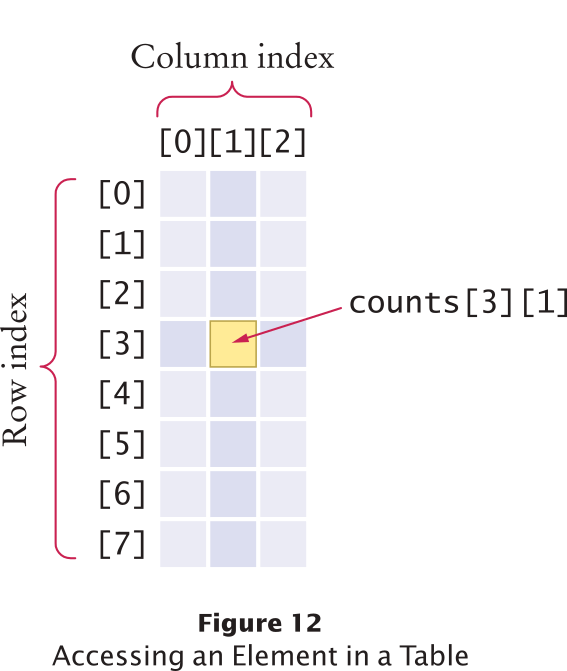

In [21]:
Image( 'figures/png/pfe3-figure-012.png', width=250 )

### 6.7.3 Locating Neighboring Elements

From your textbook:
> You need to be careful about computing neighbors at the boundary of the list. For 
example, `counts[0][1]` has no neighbor to the top. Consider the task of computing the 
sum of the neighbors to the top and bottom of the element `counts[i][j]`. You need to 
check whether the element is located at the top or bottom of the table.

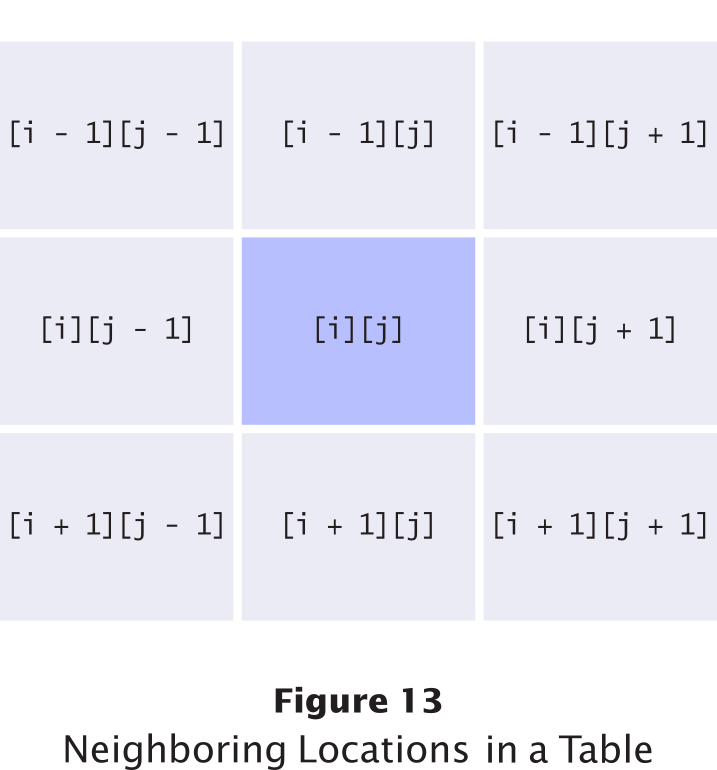

In [22]:
Image( 'figures/png/pfe3-figure-013.png', width=250 )

Note that `i`s are *row* indices, and `j`s are *column* indices.

### 6.7.4 Computing Row and Column Totals

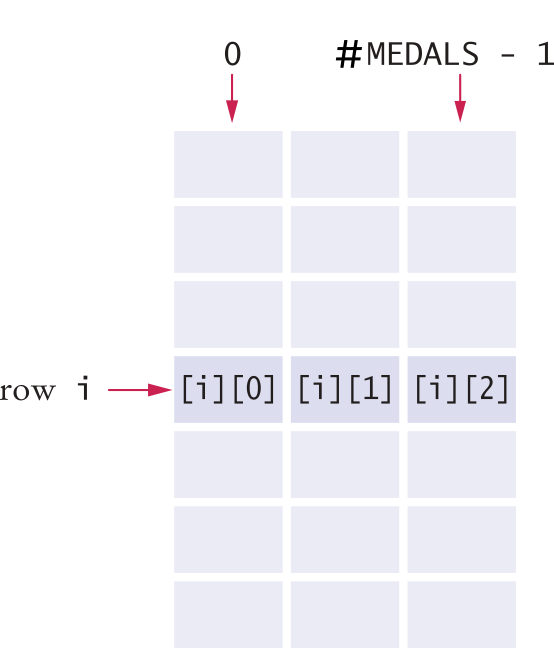

In [25]:
Image( 'figures/png/pfe3-figure-013b.png', width=200 )

Let us write a function that reads the data from an input file and returns us the list of columns and the data about medals each country received in the Olympic Games.

Note how we handle empty lines in the code below, even though CSV files should ideally not have empty lines. We implement this by checking whether the current line from the input file contains nothing but spaces. Even if a line has no characters on it, that line would be read in as an empty string.

__REMEMBER:__ Input handling is a critical aspect of software development. 

In [23]:
def read_data( filepath ):
    """
    Reads the data from the specified input file and returns both
    the list of columns and a list of medal data (list of lists).
    """
    def cleanup( name ):
        """
        An inner function that cleans up a given name/string
        """
        parts = name.title().split()
        clean = " ".join( parts )
        return clean
        
    data = []
    countries = []
    infile = open( filepath ) # Open for READING / Ideally the with-construct would be better here!
    columns = [cleanup( n ) for n in infile.readline().split( ';' )] # Read the column names first.

    for cur_line in infile: # Continue from the second line on
        #
        if cur_line.isspace():
            #
            # We have an empty line. So we skip doing anything else below.
            #
            continue
            
        country, gold, silver, bronze = cur_line.split( ';' ) # We have strings here
        
        countries.append( cleanup( country ) )
        data.append( [int( gold ), int( silver ), int( bronze )] )  
        
    return columns, countries, data

### __TEST__ ...

In [24]:
filepath = 'data/pfe3-figure-010.dat'

column_labels, countries, medal_data = read_data( filepath )

In [25]:
column_labels

['Country', 'Gold', 'Silver', 'Bronze']

In [26]:
countries

['Canada',
 'Italy',
 'Germany',
 'Japan',
 'Kazakhstan',
 'Russia',
 'South Korea',
 'United States']

In [27]:
medal_data

[[0, 3, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [3, 1, 1],
 [0, 1, 0],
 [1, 0, 1]]

So far, so good ...

Note that, unlike the code in your textbook, we do not need to know how many countries we have data for in our input file. The method we used above to read the data in determines how many rows we have in the input file automatically.

In [28]:
def row_sum( medal_data, row_index ):
    """
    Returns the sum of a given row, indicated with its index.
    """
    # Input correctness checking
    #
    assert 0 <= row_index < len( medal_data ), f"Row index {row_index} is out of range"
    
    row_data = medal_data[row_index]
    return sum( row_data )

In [29]:
row_sum( medal_data, 5 )

5

In [30]:
row_sum( medal_data, 7 )

2

In [31]:
row_sum( medal_data, 12 )

AssertionError: Row index 12 is out of range

In [32]:
def col_sum( medal_data, col_index ):
    """
    Returns the sum of a given row, indicated with its index.
    """
    assert 0 <= col_index < len( medal_data[0] ), f"Column index {col_index} is out of range"
    values = []
    for cur_row in range( len( medal_data ) ):
        #
        row_data = medal_data[cur_row]
        col_data = row_data[col_index]
        values.append( col_data )
        
    return sum( values )

In [33]:
col_sum( medal_data, 0 )

5

In [34]:
col_sum( medal_data, 1 )

5

In [35]:
col_sum( medal_data, 2 )

5

In [37]:
col_sum( medal_data, 3 )

AssertionError: Column index 3 is out of range

There was actually no need to run through row indices.

In [38]:
def col_sum( medal_data, col_index ):
    """
    Returns the sum of a given row, indicated with its index.
    """
    assert 0 <= col_index < len( medal_data[0] ), f"Column index {col_index} is out of range"
    values = []
    for row_data in medal_data:
        #
        col_data = row_data[col_index]
        values.append( col_data )
        
    return sum( values )

In [39]:
col_sum( medal_data, 0 )

5

In [40]:
col_sum( medal_data, 1 )

5

In [41]:
col_sum( medal_data, 2 )

5

In [42]:
col_sum( medal_data, 3 )

AssertionError: Column index 3 is out of range

### 6.7.5 Using Tables with Functions

In the above code, we obtained the _dimensions_ of the 2d-table by doing the following:

- `len( medal_data )` gave us the the number of rows of data
- `len( medal_data[0] )` gave us the number of columns 

Let us write a function that nicely prints out the data in tabular form with all data.

In [43]:
def print_table( medal_data, countries, columns, table_width=50 ):
    """
    Prints the Olympic medal data in tabular form to the screen
    
    See 
        https://www.w3schools.com/charsets/ref_utf_box.asp
    
    for characters that are available for drawing shapes.
    """
    top_rule = "━" * table_width
    mid_rule = "─" * table_width
    bottom_rule = top_rule
    
    print( top_rule )
    print( f"{columns[0]:15s} {columns[1]:>8s} {columns[2]:>8s} {columns[3]:>8s} {columns[4]:>8s}" )
    print( mid_rule )
    
    for row_index in range( len( medal_data ) ):
        #
        row_total = row_sum( medal_data, row_index )
        n_gold, n_silver, n_bronze = medal_data[row_index] # Tuple assignment
        country = countries[row_index]
        print( f"{country:15s} {n_gold:8d} {n_silver:8d} {n_bronze:8d} {row_total:8d}" )
        
    print( bottom_rule )

In [44]:
table_columns = column_labels + ["Total"]

In [45]:
table_columns

['Country', 'Gold', 'Silver', 'Bronze', 'Total']

In [46]:
print_table( medal_data, countries, table_columns )

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Country             Gold   Silver   Bronze    Total
──────────────────────────────────────────────────
Canada                 0        3        0        3
Italy                  0        0        1        1
Germany                0        0        1        1
Japan                  1        0        0        1
Kazakhstan             0        0        1        1
Russia                 3        1        1        5
South Korea            0        1        0        1
United States          1        0        1        2
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


### __A caution on using list duplication__

See __SELF-CHECK__ Questions __36__ and __37__ on page 361:

> 36. What is wrong with the following code for creating a table? 
        row = [0] * COLUMNS
        table = row * ROWS
> 37. What is wrong with the following code for creating a table? 
        row = [0] * COLUMNS
        table = [row] * ROWS

In [49]:
# A table with 7 rows and 5 columns
#
row = [1] * 5
print( f"--- row: {row}" )
table = [row] * 7
table

--- row: [1, 1, 1, 1, 1]


[[1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1]]

These questions get at the same issue, so let us just use Question 36 to illustrate what is wrong.

In [50]:
counts = [0] * 5

In [51]:
counts

[0, 0, 0, 0, 0]

Let's arbitrarily assign values to some of the available index locations.

In [52]:
counts[0] = 3
counts[3] = 5
counts[4] = 7

counts

[3, 0, 0, 5, 7]

This means we can _independently_ assign values to different values in the `counts` list.

Now let us create a "table" of values using the `counts` above.

In [53]:
from pprint import pprint

In [54]:
# Create a table with 7 rows X 5 columns
#
row = [0] * 5 # 5 columns
table = [row] * 7 # 7 rows

In [55]:
pprint( table )

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]


This looks fine. 

Let us assign some values into this table and see what happens.

In [56]:
table[0][0] = '⏹'
table[0][3] = '◆'
table[2][4] = '⏺'

In [57]:
pprint( table )

[['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺'],
 ['⏹', 0, 0, '◆', '⏺']]


Strangely, our three assignments are being reflected in all rows of the data! However, we only meant to modify three cells!

When something like this happens, we should go back to the fundamentals we have covered earlier and check what it is we have on each row. That is, if all value modifications got duplicated all over the place, this should only mean that we have duplicated references!

This is easy to check? Enter `id()` ...

In [58]:
for cur_row in table:
    #
    print( f"--- id( {cur_row} ): {id( cur_row ) }" )

--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968
--- id( ['⏹', 0, 0, '◆', '⏺'] ): 140370074707968


All rows are physically identical! This is why, as we suspected, the assignments got duplicated.

- When we modified the table using `table[0][0]`, we actually modified the values in column `0` in all rows.
- When we modified the table using `table[0][3]`, we actually modified the values in column `3` in all rows. 
- When we modified the table using `table[2][4]`, we actually modified the values in column `4` in all rows.

It actually did not matter what the row index was, since all rows refer to the same list!

This mistake teaches us that we should create _new_ rows and insert them separately to create 2d data, that is, a table.

Next, let us consider data that requires column summation.

This data is presented in _Worked Example 6.3: A World Population Table_ on page 362 in your textbook. Again, we will assume that this data is available in a file in CSV format as before. Note that we added the column label, `Continent`, to complete the table according to the CSV format.

In [59]:
%%file data/pfe3-population-vs-year.dat
Continent;1750;1800;1850;1900;1950;2000;2050
Africa;106;107;111;133;221;767;1766
Asia;502;635;809;947;1402;3634;5268
Australia;2;2;2;6;13;30;46
Europe;163;203;276;408;547;729;628
North America;2;7;26;82;172;307;392
South America;16;24;38;74;167;511;809

Overwriting data/pfe3-population-vs-year.dat


This data is available in [`data/pfe3-population-vs-year.dat`](data/pfe3-population-vs-year.dat).

__QUESTION:__: Can we use our `read_data()` function to read this data? Let us try.

In [60]:
read_data( 'data/pfe3-population-vs-year.dat' )

ValueError: too many values to unpack (expected 4)

No, because we had written it specifically to read the Olympic medal data with three columns, plus the country column. 

This new population data has seven data columns, plus one more for the continent information. The old function will definitely not work.

So the big question is: Can we write a (more) __general__ function that can read any well-formed CSV data?

In [61]:
def read_csv_data( csv_filepath, delimiter=';', convert=int ):
    """
    Reads the CSV data from the specified input file and returns the
    column labels (as strings), row labels (as strings), and remaining data
    converted using the convert function, whose default value is int().
    """
    def cleanup( name ):
        """
        """
        parts = name.title().split()
        clean = " ".join( parts )
        return clean

    infile = open( csv_filepath ) # Open for READING
    
    column_labels = [cleanup( n ) for n in infile.readline().split( delimiter )] # Read the column names first.
    numeric_data = []
    row_labels = []
    
    for cur_line in infile:
        #
        if cur_line.isspace():
            #
            # We have an empty line. So we skip doing anything else below.
            #
            continue
            
        cur_parts = cur_line.split( delimiter )
        cur_row_label = cleanup( cur_parts[0] ) # Clean up the row label
        cur_row_data = [convert( v ) for v in cur_parts[1:]]
        
        row_labels.append( cur_row_label )
        numeric_data.append( cur_row_data )  
        
    return column_labels, row_labels, numeric_data

Let us __TEST__ this new and revamped function with our olympic medal data.

In [62]:
col_labels, row_labels, numeric_data = read_csv_data( 'data/pfe3-figure-010.dat' )

In [63]:
col_labels

['Country', 'Gold', 'Silver', 'Bronze']

In [64]:
row_labels

['Canada',
 'Italy',
 'Germany',
 'Japan',
 'Kazakhstan',
 'Russia',
 'South Korea',
 'United States']

In [65]:
numeric_data

[[0, 3, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [3, 1, 1],
 [0, 1, 0],
 [1, 0, 1]]

Sure, this new function for reading the CSV data is clearly better than the previous version. 

However, note that it still makes certain assumptions. For example, it assumes that all column and row labels are strings, and that all remaining data is properly specified.

Instead of implicitly assuming that the numeric data is integer, let us have our `read_csv_data()` convert our numeric data to `float` for us.

In [66]:
read_csv_data( 'data/pfe3-figure-010.dat', convert=float )

(['Country', 'Gold', 'Silver', 'Bronze'],
 ['Canada',
  'Italy',
  'Germany',
  'Japan',
  'Kazakhstan',
  'Russia',
  'South Korea',
  'United States'],
 [[0.0, 3.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 1.0],
  [1.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [3.0, 1.0, 1.0],
  [0.0, 1.0, 0.0],
  [1.0, 0.0, 1.0]])

---

Let us now read our new population data.

In [67]:
col_labels, row_labels, numeric_data = read_csv_data( 'data/pfe3-population-vs-year.dat' )

In [68]:
col_labels

['Continent', '1750', '1800', '1850', '1900', '1950', '2000', '2050']

In [69]:
row_labels

['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'South America']

In [70]:
numeric_data

[[106, 107, 111, 133, 221, 767, 1766],
 [502, 635, 809, 947, 1402, 3634, 5268],
 [2, 2, 2, 6, 13, 30, 46],
 [163, 203, 276, 408, 547, 729, 628],
 [2, 7, 26, 82, 172, 307, 392],
 [16, 24, 38, 74, 167, 511, 809]]

---

Since we had made strict assumptions about our Olympic medal data, we will not even bother testing whether our previous `print_table()` function will work to print out the population data. You can try this at home, but it will not work.

So let us try to write a more general function, and let us use incremental development.

---

In [72]:
def print_csv_table_w1( column_labels, row_labels, numeric_data, column_widths ):
    """
    Prints the provided numeric data for a table with its column and row labels.
    """
    assert column_widths and len( column_labels ) == len( column_widths ), "Bad column width specification!"
    
    table_width = sum( column_widths ) + len( column_widths ) - 1
    top_rule = "━" * table_width
    mid_rule = "─" * table_width
    bottom_rule = top_rule
    
    print( top_rule )
    
    for label_index, label_val in enumerate( column_labels ):
        #
        # {VAR_NAME:FORMAT_SPEC} 
        #
        print( f"{label_val:{column_widths[label_index]}s}", end=" " )
    #             
    # NOT PRINTING ANYTHING ELSE JUST YET/TO BE COMPLETED LATER!
    #
    print()
    print( mid_rule )
    print( bottom_rule )

In [73]:
print_csv_table_w1( col_labels, row_labels, numeric_data, [15, 8, 8, 8, 8, 8, 8, 8] )

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Continent       1750     1800     1850     1900     1950     2000     2050     
──────────────────────────────────────────────────────────────────────────────
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


Looks fine ...

In [74]:
>>> width = 20
>>> print( "|{:>{width}}|{:^{width}}|{:<{width}}|".format( "Monty", "Python", "Circus", width=width ) )

|               Monty|       Python       |Circus              |


---

In [75]:
def print_csv_table( column_labels, row_labels, numeric_data, column_widths, total_row_name="Total" ):
    """
    Prints the provided numeric data for a table with its column and row labels.
    """
    assert column_widths and len( column_labels ) == len( column_widths ), "Bad column width specification!"
        
    table_width = sum( column_widths ) + len( column_widths ) - 1
    top_rule = "━" * table_width
    mid_rule = "─" * table_width
    bottom_rule = top_rule
    
    print( top_rule )
    
    # STEP 1: Print column labels
    #
    for label_index, label_val in enumerate( column_labels ):
        #
        print( f"{label_val:>{column_widths[label_index]}s}", end=" " )
  
    print()
    print( mid_rule )
    
    # STEP 2: Print row data
    #
    for cur_row_index in range( len( numeric_data ) ):
        #
        cur_row_label = row_labels[cur_row_index]

        # Print category/row label first
        #
        print( f"{cur_row_label:<{column_widths[0]}}", end=" " )

        cur_row_data = numeric_data[cur_row_index]
                  
        for num_index, num_val in enumerate( cur_row_data ):
            #
            print( f"{num_val:>{column_widths[num_index + 1]}}", end=" " )
        
        print()
    
    print( mid_rule )
 
    # STEP 3: Print column totals. First print the total row label.
    #
    print( f"{total_row_name:<{column_widths[0]}}", end=" " )

    for col_index in range( len( numeric_data[0] ) ):
        #
        col_total = col_sum( numeric_data, col_index )
        print( f"{col_total:>{column_widths[num_index + 1]}}", end=" " )
        
    print()
    
    print( bottom_rule )

In [76]:
print_csv_table( col_labels, row_labels, numeric_data, [20, 8, 8, 8, 8, 8, 8, 8] )

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
           Continent     1750     1800     1850     1900     1950     2000     2050 
───────────────────────────────────────────────────────────────────────────────────
Africa                    106      107      111      133      221      767     1766 
Asia                      502      635      809      947     1402     3634     5268 
Australia                   2        2        2        6       13       30       46 
Europe                    163      203      276      408      547      729      628 
North America               2        7       26       82      172      307      392 
South America              16       24       38       74      167      511      809 
───────────────────────────────────────────────────────────────────────────────────
Total                     791      978     1262     1650     2522     5978     8909 
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Still, there is still a lot of room for improving as to how we may print out out tabular data using a nice layout.

What we did above is only the beginning.

---

#### __Worked Example 6.4 Graphics: Drawing Regular Polygons__

___NOTE: The material in this section will be covered in a later tutorial___

---

### <font color="#a00">__MATERIAL BELOW TO BE COVERED LATER. YOU MAY SKIP FOR NOW__</font>

---

In [ ]:
bool( [1, 2, 3] )

In [ ]:
bool( "A" )

In [ ]:
bool( "" )

In [ ]:
bool( 0 )

In [ ]:
bool( [] )

In [ ]:
bool( list() )

In [ ]:
bool( True )

In [ ]:
bool( False )

In [ ]:
bool( {} )

In [ ]:
bool( () )

In [ ]:
bool( 17 )

In [ ]:
bool( [ [] ] ), len( [[]] )

In [ ]:
cheeses = ["edam", "gouda", "cheddar", "brie", "ricotta"] 

In [ ]:
"gouda" in cheeses

In [ ]:
"halloumi" in cheeses

In [ ]:
["edam", "gouda"] in cheeses

In [ ]:
cheeses_test = [["edam", "gouda"], "cheddar", "brie", "ricotta"] 

In [ ]:
"gouda" in cheeses_test

In [ ]:
"edam" in cheeses_test

In [ ]:
["edam", "gouda"] in cheeses_test

In [ ]:
help( list )

In [ ]:
cheeses.index( "gouda" )

In [ ]:
cheeses.index( "ricotta" )

In [ ]:
cheeses.index( "halloumi" )

In [ ]:
cheese_type = "halloumi"
index = None
if cheese_type in cheeses:
    index = cheeses.index( cheese_type )
print( "{} index: {}".format( cheese_type, index ) ) 

In [ ]:
cheese_type = "brie"
index = None
if cheese_type in cheeses:
    index = cheeses.index( cheese_type )
print( "{} index: {}".format( cheese_type, index ) ) 

In [ ]:
cheeses.append( "halloumi" )
cheeses

In [ ]:
new_cheeses = ["permesan", "feta"]
cheeses.extend( new_cheeses )
cheeses

In [ ]:
cheeses.insert( 3, "camembert" )
cheeses

In [ ]:
cheeses.insert( -2, "romano" )
cheeses

In [ ]:
cheeses.remove( "ricotta" )
cheeses

In [ ]:
cheeses.remove( "manchego" )
cheeses

In [ ]:
cheeses.pop()

In [ ]:
cheeses

In [ ]:
cheeses.pop( 3 )

In [ ]:
cheeses

In [ ]:
cheeses.reverse() # Note that list.reverse() is a Python 3 function, not Python 2!!!
cheeses

In [ ]:
cheeses.sort()
cheeses

In [ ]:
cheeses.sort( reverse=True )
cheeses

In [ ]:
sorted( cheeses )

In [ ]:
sorted( cheeses, reverse=True )

In [ ]:
cheeses

In [ ]:
sorted( cheeses, key=lambda k: k[-1] )

In [ ]:
sorted( cheeses, key=lambda k: k[-1], reverse=True )

In [ ]:
[0] * 5

In [ ]:
[[0]] * 5 # [[0]] + [[0]] + [[0]] + [[0]] + [[0]] 

In [ ]:
[["a", "b"]] * 3

---

---

In [ ]:
t = [1, 2, 3, 4, 5, 6, 7, 8]
#    0  1  2  3  4  5  6  7
t[2:6]

In [ ]:
t[2:6] = []
t

In [ ]:
v = [1, 2, 3, 4, 5, 6, 7, 8]
v[2:6]

In [ ]:
v[2:6] = 'a'
v

In [ ]:
v[1:3] = range( 44, 99, 10 )
v

---